<a href="https://colab.research.google.com/github/cgasdic/TELECOMX_LATAM/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [ ]:
import pandas  as pd

In [ ]:
datos = pd.read_json('/content/TelecomX_Data.json')

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [ ]:
display(datos.head())

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
# Extracción de los datos a nuevos dataframe
customer_data = pd.json_normalize(datos['customer'])
phone_data = pd.json_normalize(datos['phone'])
internet_data = pd.json_normalize(datos['internet'])
account_data = pd.json_normalize(datos['account'])

In [ ]:
# Concatenar las columnas sin diccionarios con las de los nuevos dataframe normalizados
datos = pd.concat([datos[['customerID', 'Churn']], customer_data, phone_data, internet_data, account_data], axis=1)
datos['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [ ]:
display(datos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


None

#🔧 Transformación

In [ ]:
#Transformar columnas a minisculas
columnas = list(datos.columns)
columnas
datos.rename(columns=lambda x: x.lower(), inplace=True)
#traducir nombres de las columnas
nombres_traducidos = ['id_de_cliente','rotacion','genero','senior','pareja','dependientes','antiguedad','servicio_telefonico','varias_lineas','servicio_de_internet','seguridad_en_linea','copia_de_seguridad_en_linea','proteccion_de_dispositivos','soporte_tecnico','transmision_de_television','transmisión_de_películas','contrato','facturacion_electronica','metodo_de_pago','cargos_mensuales','cargos_totales']
datos.columns = nombres_traducidos
datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id_de_cliente                7267 non-null   object 
 1   rotacion                     7267 non-null   object 
 2   genero                       7267 non-null   object 
 3   senior                       7267 non-null   int64  
 4   pareja                       7267 non-null   object 
 5   dependientes                 7267 non-null   object 
 6   antiguedad                   7267 non-null   int64  
 7   servicio_telefonico          7267 non-null   object 
 8   varias_lineas                7267 non-null   object 
 9   servicio_de_internet         7267 non-null   object 
 10  seguridad_en_linea           7267 non-null   object 
 11  copia_de_seguridad_en_linea  7267 non-null   object 
 12  proteccion_de_dispositivos   7267 non-null   object 
 13  soporte_tecnico   

In [ ]:
# aplicar metodo unique
datos['rotacion'].unique()

array(['No', 'Yes', ''], dtype=object)

In [ ]:
#Cambiar tipos de datos a string

columnas_string_list = ['rotacion','genero', 'pareja', 'dependientes','servicio_telefonico','varias_lineas','servicio_de_internet','seguridad_en_linea','copia_de_seguridad_en_linea','proteccion_de_dispositivos','soporte_tecnico','transmision_de_television','transmisión_de_películas','contrato','facturacion_electronica','metodo_de_pago']
columnas_string_dict = {col: 'string' for col in columnas_string_list}
datos = datos.astype(columnas_string_dict)




In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id_de_cliente                7267 non-null   object 
 1   rotacion                     7267 non-null   string 
 2   genero                       7267 non-null   string 
 3   senior                       7267 non-null   int64  
 4   pareja                       7267 non-null   string 
 5   dependientes                 7267 non-null   string 
 6   antiguedad                   7267 non-null   int64  
 7   servicio_telefonico          7267 non-null   string 
 8   varias_lineas                7267 non-null   string 
 9   servicio_de_internet         7267 non-null   string 
 10  seguridad_en_linea           7267 non-null   string 
 11  copia_de_seguridad_en_linea  7267 non-null   string 
 12  proteccion_de_dispositivos   7267 non-null   string 
 13  soporte_tecnico   

In [ ]:
datos['cargos_totales'] = pd.to_numeric(datos['cargos_totales'], errors='coerce').fillna(0)
datos['cargos_totales'] = datos['cargos_totales'].astype("float64")
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id_de_cliente                7267 non-null   object 
 1   rotacion                     7267 non-null   string 
 2   genero                       7267 non-null   string 
 3   senior                       7267 non-null   int64  
 4   pareja                       7267 non-null   string 
 5   dependientes                 7267 non-null   string 
 6   antiguedad                   7267 non-null   int64  
 7   servicio_telefonico          7267 non-null   string 
 8   varias_lineas                7267 non-null   string 
 9   servicio_de_internet         7267 non-null   string 
 10  seguridad_en_linea           7267 non-null   string 
 11  copia_de_seguridad_en_linea  7267 non-null   string 
 12  proteccion_de_dispositivos   7267 non-null   string 
 13  soporte_tecnico   

In [ ]:
# prompt: insertar nueva columna en dataframe datos

# Crear Columna de cuentas diarias
datos['cargos_diarios'] = datos['cargos_totales'] / 30
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id_de_cliente                7267 non-null   object 
 1   rotacion                     7267 non-null   string 
 2   genero                       7267 non-null   string 
 3   senior                       7267 non-null   int64  
 4   pareja                       7267 non-null   string 
 5   dependientes                 7267 non-null   string 
 6   antiguedad                   7267 non-null   int64  
 7   servicio_telefonico          7267 non-null   string 
 8   varias_lineas                7267 non-null   string 
 9   servicio_de_internet         7267 non-null   string 
 10  seguridad_en_linea           7267 non-null   string 
 11  copia_de_seguridad_en_linea  7267 non-null   string 
 12  proteccion_de_dispositivos   7267 non-null   string 
 13  soporte_tecnico   

In [ ]:
display(datos.head())

,id_de_cliente,rotacion,genero,senior,pareja,dependientes,antiguedad,servicio_telefonico,varias_lineas,servicio_de_internet,...,proteccion_de_dispositivos,soporte_tecnico,transmision_de_television,transmisión_de_películas,contrato,facturacion_electronica,metodo_de_pago,cargos_mensuales,cargos_totales,cargos_diarios
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,19.776667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,18.080000
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,9.361667
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,41.261667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,8.913333


In [ ]:
# convertir a minusculas varias columnas

# Columnas para convertir a minúsculas
columnas_a_minusculas = ['genero', 'pareja', 'dependientes', 'servicio_telefonico',
                        'varias_lineas', 'servicio_de_internet', 'seguridad_en_linea',
                        'copia_de_seguridad_en_linea', 'proteccion_de_dispositivos',
                        'soporte_tecnico', 'transmision_de_television', 'transmisión_de_películas',
                        'contrato', 'facturacion_electronica', 'metodo_de_pago', 'rotacion','id_de_cliente']

# Aplicar la función lower() a las columnas especificadas
for columna in columnas_a_minusculas:
  datos[columna] = datos[columna].str.lower()

In [ ]:
datos.head()

,id_de_cliente,rotacion,genero,senior,pareja,dependientes,antiguedad,servicio_telefonico,varias_lineas,servicio_de_internet,...,proteccion_de_dispositivos,soporte_tecnico,transmision_de_television,transmisión_de_películas,contrato,facturacion_electronica,metodo_de_pago,cargos_mensuales,cargos_totales,cargos_diarios
0,0002-orfbo,no,female,0,yes,yes,9,yes,no,dsl,...,no,yes,yes,no,one year,yes,mailed check,65.6,593.30,19.776667
1,0003-mknfe,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,yes,month-to-month,no,mailed check,59.9,542.40,18.080000
2,0004-tlhlj,yes,male,0,no,no,4,yes,no,fiber optic,...,yes,no,no,no,month-to-month,yes,electronic check,73.9,280.85,9.361667
3,0011-igkff,yes,male,1,yes,no,13,yes,no,fiber optic,...,yes,no,yes,yes,month-to-month,yes,electronic check,98.0,1237.85,41.261667
4,0013-exchz,yes,female,1,yes,no,3,yes,no,fiber optic,...,no,yes,yes,no,month-to-month,yes,mailed check,83.9,267.40,8.913333


In [ ]:
datos['id_de_cliente'] = datos['id_de_cliente'].apply(lambda x: x.replace('-','').replace(',','').strip())
datos['contrato'] = datos['contrato'].apply(lambda x: x.replace('-','').replace(',','').strip())
datos['contrato']
datos['metodo_de_pago'] = datos['metodo_de_pago'].apply(lambda x: x.replace('(','').replace(')','').strip())
datos['metodo_de_pago'] = datos['metodo_de_pago'].str.replace(' ', '', regex=False)
#datos['contrato'] = datos['contrato'].str.replace('[^a-zA-Z0-9\-\']','',regex=True)
#datos['contrato'] = datos['contrato'].str.replace('(?<!\w)-(?<!\w)','',regex=True)
#datos['rotacion'] = datos['rotacion'].astype('int64')

In [ ]:
datos['rotacion'] = datos['rotacion'].replace(['', None], 'desconocido')
datos['rotacion'] = datos['rotacion'].astype('object').replace({'yes': 1, 'no': 0, 'desconocido': 0}).fillna(3)
print(datos['rotacion'].unique())
print(datos['rotacion'].dtype)
datos['rotacion'] = datos['rotacion'].astype('float64').astype('int64')
datos.info()

[0 1]
int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id_de_cliente                7267 non-null   object 
 1   rotacion                     7267 non-null   int64  
 2   genero                       7267 non-null   string 
 3   senior                       7267 non-null   int64  
 4   pareja                       7267 non-null   string 
 5   dependientes                 7267 non-null   string 
 6   antiguedad                   7267 non-null   int64  
 7   servicio_telefonico          7267 non-null   string 
 8   varias_lineas                7267 non-null   string 
 9   servicio_de_internet         7267 non-null   string 
 10  seguridad_en_linea           7267 non-null   string 
 11  copia_de_seguridad_en_linea  7267 non-null   string 
 12  proteccion_de_dispositivos   7267 non-null   string 
 13  soport

/tmp/ipython-input-19-3177643044.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos['rotacion'] = datos['rotacion'].astype('object').replace({'yes': 1, 'no': 0, 'desconocido': 0}).fillna(3)


In [ ]:
# prompt: remmplazar valor 3 columna rotacion por 0

datos['rotacion'] = datos['rotacion'].replace(3, 0)
datos.to_excel('dt.xlsx')

In [ ]:
# prompt: cambiar datos de columna genero a español

datos['genero'] = datos['genero'].replace({'female': 'Mujeres', 'male': 'Hombres'})
print(datos['genero'].unique())

<StringArray>
['Mujeres', 'Hombres']
Length: 2, dtype: string


In [ ]:
datos.head()

,id_de_cliente,rotacion,genero,senior,pareja,dependientes,antiguedad,servicio_telefonico,varias_lineas,servicio_de_internet,...,proteccion_de_dispositivos,soporte_tecnico,transmision_de_television,transmisión_de_películas,contrato,facturacion_electronica,metodo_de_pago,cargos_mensuales,cargos_totales,cargos_diarios
0,0002orfbo,0,Mujeres,0,yes,yes,9,yes,no,dsl,...,no,yes,yes,no,one year,yes,mailedcheck,65.6,593.30,19.776667
1,0003mknfe,0,Hombres,0,no,no,9,yes,yes,dsl,...,no,no,no,yes,monthtomonth,no,mailedcheck,59.9,542.40,18.080000
2,0004tlhlj,1,Hombres,0,no,no,4,yes,no,fiber optic,...,yes,no,no,no,monthtomonth,yes,electroniccheck,73.9,280.85,9.361667
3,0011igkff,1,Hombres,1,yes,no,13,yes,no,fiber optic,...,yes,no,yes,yes,monthtomonth,yes,electroniccheck,98.0,1237.85,41.261667
4,0013exchz,1,Mujeres,1,yes,no,3,yes,no,fiber optic,...,no,yes,yes,no,monthtomonth,yes,mailedcheck,83.9,267.40,8.913333


In [ ]:
# prompt: cambiar datos de columna contrato a español

datos['contrato'] = datos['contrato'].replace({
    'monthtomonth': 'mes a mes',
    'one year': 'un año',
    'two year': 'dos años'
})
print(datos['contrato'].unique())

# traducir columna metodo de pago a español

datos['metodo_de_pago'] = datos['metodo_de_pago'].replace({
    'electroniccheck': 'cheque electrónico',
    'mailedcheck': 'cheque enviado',
    'banktransferautomatic': 'transferencia bancaria automática',
    'creditcardautomatic': 'tarjeta de crédito automática'
})
print(datos['metodo_de_pago'].unique())


['un año' 'mes a mes' 'dos años']
['cheque enviado' 'cheque electrónico' 'tarjeta de crédito automática'
 'transferencia bancaria automática']


#📊 Carga y análisis

In [ ]:
datos.describe()


,rotacion,senior,antiguedad,cargos_mensuales,cargos_totales,cargos_diarios
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.162653,32.346498,64.720098,2277.182035,75.906068
std,0.437115,0.369074,24.571773,30.129572,2268.648587,75.621620
min,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,9.000000,35.425000,396.200000,13.206667
50%,0.000000,0.000000,29.000000,70.300000,1389.200000,46.306667
75%,1.000000,0.000000,55.000000,89.875000,3778.525000,125.950833
max,1.000000,1.000000,72.000000,118.750000,8684.800000,289.493333


In [ ]:
datos.head()

,id_de_cliente,rotacion,genero,senior,pareja,dependientes,antiguedad,servicio_telefonico,varias_lineas,servicio_de_internet,...,proteccion_de_dispositivos,soporte_tecnico,transmision_de_television,transmisión_de_películas,contrato,facturacion_electronica,metodo_de_pago,cargos_mensuales,cargos_totales,cargos_diarios
0,0002orfbo,0,Mujeres,0,yes,yes,9,yes,no,dsl,...,no,yes,yes,no,un año,yes,cheque enviado,65.6,593.30,19.776667
1,0003mknfe,0,Hombres,0,no,no,9,yes,yes,dsl,...,no,no,no,yes,mes a mes,no,cheque enviado,59.9,542.40,18.080000
2,0004tlhlj,1,Hombres,0,no,no,4,yes,no,fiber optic,...,yes,no,no,no,mes a mes,yes,cheque electrónico,73.9,280.85,9.361667
3,0011igkff,1,Hombres,1,yes,no,13,yes,no,fiber optic,...,yes,no,yes,yes,mes a mes,yes,cheque electrónico,98.0,1237.85,41.261667
4,0013exchz,1,Mujeres,1,yes,no,3,yes,no,fiber optic,...,no,yes,yes,no,mes a mes,yes,cheque enviado,83.9,267.40,8.913333


In [ ]:
# grafico con rotacion por genero con plotly
fig_genero_rotacion = px.histogram(
    datos,
    x='rotacion',
    color='genero',
    barmode='group',
    title='Distribución de Evasión por Género ',
    labels={'rotacion': 'Estado de contrato', 'genero': 'Género'},
    category_orders={'rotacion': [0, 1]},  # Asegura el orden 0, 1
    width=600, # Ancho de 600 pixels
    height=500 # Alto de 400 pixels
)

# Personalizar las etiquetas del eje x
fig_genero_rotacion.update_xaxes(
    tickvals=[0, 1],
    ticktext=['Permanecen', 'Cancelan']
)
fig_genero_rotacion.update_traces(texttemplate='%{y}', textposition='outside')
# Mostrar el gráfico interactivo
fig_genero_rotacion.show()


In [ ]:
# prompt: grafico con rotacion por contrato con plotly

import plotly.express as px

# Gráfico con rotación por contrato con plotly
fig_contrato_rotacion = px.histogram(
    datos,
    x='rotacion',
    color='contrato',
    barmode='group',
    title='Distribución de Evasión por Tipo de Contrato',
    labels={'rotacion': 'Estado de contrato', 'contrato': 'Tipo de Contrato'},
    category_orders={'rotacion': [0, 1]},  # Asegura el orden 0, 1
    width=700, # Ancho de 700 pixels
    height=500 # Alto de 500 pixels
)

# Personalizar las etiquetas del eje x
fig_contrato_rotacion.update_xaxes(
    tickvals=[0, 1],
    ticktext=['Permanecen', 'Cancelan']
)

fig_contrato_rotacion.update_traces(texttemplate='%{y}', textposition='outside')

# Mostrar el gráfico interactivo
fig_contrato_rotacion.show()

In [ ]:
# grafico  con rotacion por metodo de pago con plotly

fig = px.histogram(datos,
                   x='rotacion',
                   color='metodo_de_pago',
                   barmode='group',
                   title='Distribución de Evasión por Método de Pago',
                   labels={'rotacion': 'Estado de contrato', 'metodo_de_pago': 'Método de Pago'},
                   category_orders={'rotacion': [0, 1]},
                   width=800,  # 10 * 60
                   height=500) # 6 * 60

# Personalizar las etiquetas del eje X
fig.update_xaxes(tickvals=[0, 1], ticktext=['Permanecen', 'Cancelan'])

# Añadir etiquetas de valor en las barras
fig.update_traces(texttemplate='%{y}', textposition='outside')

fig.show()


In [ ]:
# crear grafico rotacion con antiguedad con plotly ajustar
fig_antiguedad_rotacion = px.histogram(
    datos,
    x='antiguedad',
    color='rotacion',
    barmode='group',
    title='Distribución de Antiguedad por Estado de Contrato',
    labels={'antiguedad': 'Antiguedad (Meses)', 'rotacion': 'Estado de contrato'},
    category_orders={'rotacion': [0, 1]},  # Asegura el orden 0, 1 para el color
    width=800, # Ajustar ancho
    height=500 # Ajustar alto
)

# Personalizar las etiquetas del color (rotacion)
fig_antiguedad_rotacion.for_each_trace(lambda t: t.update(name='Permanecen' if t.name == '0' else 'Cancelan'))

# Añadir etiquetas de valor en las barras (opcional, puede saturar si hay muchos bins)
#fig_antiguedad_rotacion.update_traces(texttemplate='%{y}', textposition='outside')

fig_antiguedad_rotacion.show()


In [ ]:
# prompt: crear grafico rotacion por  cargos totales con plotly ajustar

# crear grafico rotacion por cargos totales con plotly
fig_cargos_totales = px.histogram(
    datos,
    x='cargos_totales',
    color='rotacion',
    barmode='group',
    title='Distribución de Cargos Totales por Estado de Contrato',
    labels={'cargos_totales': 'Cargos Totales', 'rotacion': 'Estado de contrato'},
    category_orders={'rotacion': [0, 1]}, # Asegura el orden 0, 1 para el color
    width=800, # Ancho del gráfico
    height=500 # Alto del gráfico
)

# Personalizar las etiquetas del color (rotacion)
fig_cargos_totales.for_each_trace(lambda t: t.update(name='Permanecen' if t.name == '0' else 'Cancelan'))

# Ajustar el diseño para mejorar la visualización si es necesario
fig_cargos_totales.update_layout(
    xaxis_title='Cargos Totales',
    yaxis_title='Número de Clientes',
    legend_title='Estado de Contrato'
)

# Mostrar el gráfico interactivo
fig_cargos_totales.show()

In [ ]:
# crear grafico rotacion por  cargos diarios con plotly

fig_cargos_diarios = px.histogram(
    datos,
    x='cargos_diarios',
    color='rotacion',
    barmode='group',
    title='Distribución de Cargos Diarios por Contrato',
    labels={'cargos_diarios': 'Cargos Diarios', 'rotacion': 'Contrato'},
    category_orders={'rotacion': [0, 1]},  # Asegura el orden 0, 1 para el color
    width=800,  # Ancho del gráfico
    height=500  # Alto del gráfico
)

# Personalizar las etiquetas del color (rotacion)
fig_cargos_diarios.for_each_trace(lambda t: t.update(name='Permanecen' if t.name == '0' else 'Cancelan'))

# Ajustar el diseño para mejorar la visualización si es necesario
fig_cargos_diarios.update_layout(
    xaxis_title='Cargos Diarios',
    yaxis_title='Número de Clientes',
    legend_title='Estado de Contrato'
)

# Mostrar el gráfico interactivo
fig_cargos_diarios.show()

INFORME FINAL

# El presente informe comprende al analisis de evasión de clientes para la empresa Telecom X.

La empresa requiere información de la perdida de clientes según los datos proporcionados.



LIMPIEZA Y TRATAMIENTO DE DATOS

1.- Importación de libreria pandas para analisis de datos.

2.- Importación con metódo read de archivo json proporcionado por la empresa con datos de clientes.

3.- Se consulta mediante comando info() tipo de datos del dataframe par analisis para cambio de tipo de datos según corresponda.

4.- Se extraen datos de dataframe con método normalize y se concatenan en un nuevo dataframe debido a que datos estan en formato diccionarios los cuales deben ser normalizados para extraer datos.

5.- Transformación de tipos de datos según su categoría (enteros,decimales, booleanos, y cadena de carácteres).

6.- Transformación de datos a minisculas para formatear el dataframe

7.- Busqueda y correción de inconsistencias de datos detectados como datos vacios o con espacios vacios. Métodos utilizados unique,replace,regex.astype





















ANALISIS EXPLORATORIO (GRAFICOS Y VISUALIZACIONES)




ESTADÍSTICAS

1.- El número total de clientes es 7267.
2.- El promedio de antiguedad de los clientes es de 32 meses
3.- El promedio de cargos diarios de los clientes es de 75.9
4.- El promedio de antiguedad de los clientes es de 32 meses

In [ ]:
datos.describe()

,rotacion,senior,antiguedad,cargos_mensuales,cargos_totales,cargos_diarios
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.162653,32.346498,64.720098,2277.182035,75.906068
std,0.437115,0.369074,24.571773,30.129572,2268.648587,75.621620
min,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,9.000000,35.425000,396.200000,13.206667
50%,0.000000,0.000000,29.000000,70.300000,1389.200000,46.306667
75%,1.000000,0.000000,55.000000,89.875000,3778.525000,125.950833
max,1.000000,1.000000,72.000000,118.750000,8684.800000,289.493333


CONCLUSIONES

1.- La evasión por genero da como resultado bastante parejos entre hombres y mujeres que cancelan el servicio.

2.- La evasión por tipo de contrato muestra que el contrato que mas se cancela es el tipo mes a mes.

3.- El metodo de pago de los clientes que mas cancelan el servicio es con cheque electrónico.

4.- En cuanto a analisis por antiguedad de los clientes se muestra que a menor numero de meses de contrato es mayor la evasión.

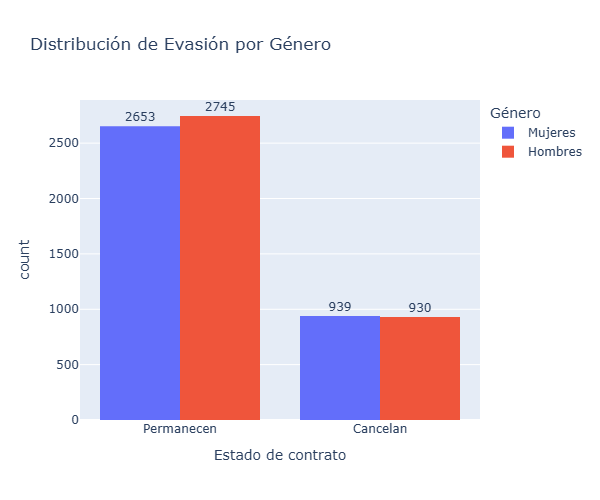



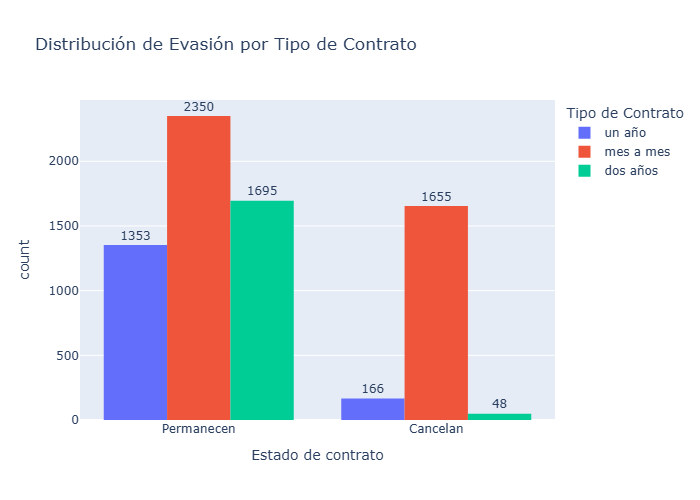


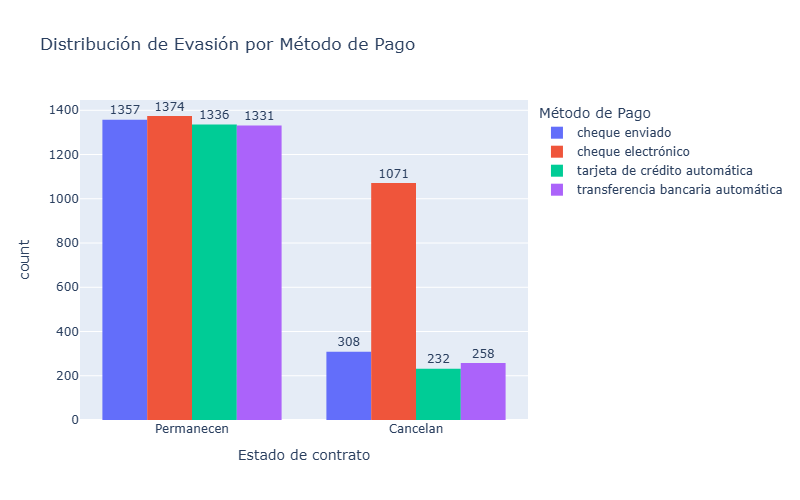




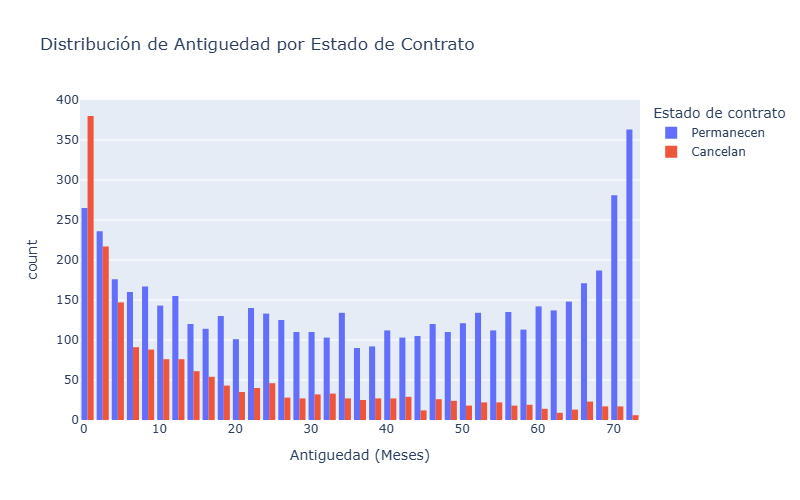


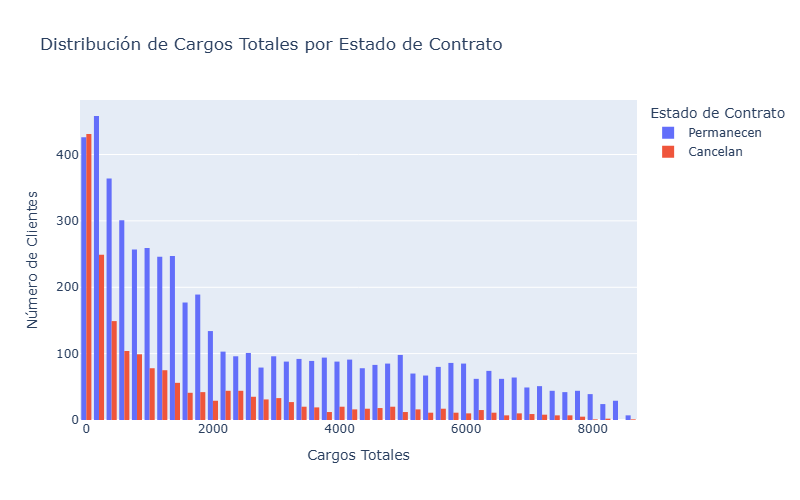


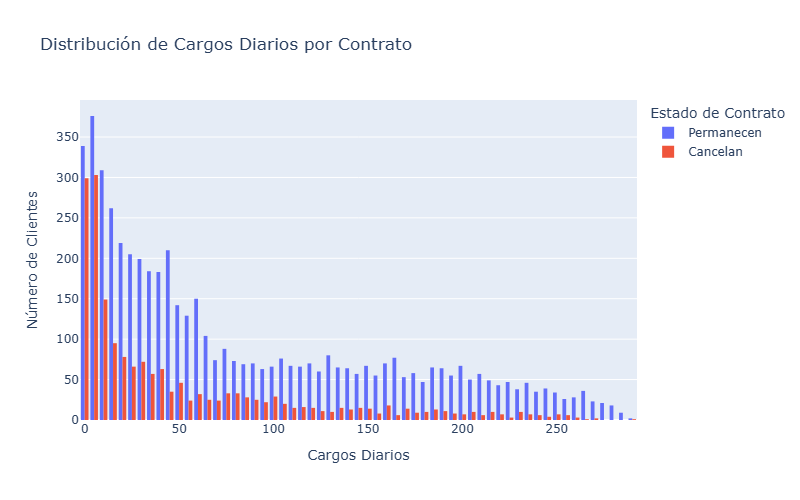